# Neural network
we can convert a regression model to a classification model just by adding a sigmoid to the output of a regression model to convert regression values in probability for the classification

the idea is to create a layer composed of: linear-regression-model + a sigmoid on ouput
and to concatenate this layer (that are exactly like a simple classification model)

is an universal opproximation function each 

is a universal approximation function can approximate any continuous function on a compact domain arbitrarily well given enough hidden units (Universal Approximation Theorem).

## ReLu
sobstitute sigmoid becouse it's easier so it's faster to compute

## What we need to train
- a model
- a loss function
- a way to compute the gradient of the loss function

## Unsupervised learning
due utilizzi: 
- compressione/diminuire le dimenzioni:
- Clusterizzazione

In [ ]:
import numpy as np
import pandas as pd

# Download `diabetes.csv` from Kaggle and place it in notebook directory
df = Path.cwd() / "data-diabetes" / "diabetes.csv"

X = df.drop("Outcome", axis=1).values   # features
y = df["Outcome"].values.reshape(-1,1)  # labels

# Standardize features
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X = (X - X_mean) / X_std

# Add bias term
X = np.hstack([np.ones((X.shape[0],1)), X])
N, d = X.shape

FileNotFoundError: [Errno 2] No such file or directory: 'data/diabetes.csv'

### SVD
scomporre una matrice A in 3 matrici, tra cui U e V sono ortogonali, mentre Sigma è una matrice diagonale

### K rank approximation
Ak è un subset della matrice A che è in grado di minimizzare una funzione  


In [6]:
# SVD

# Importing numpy
import numpy as np

# Consider an example matrix
A = np.array(
    [
        [-1, -2, 0, 1, -2, -3],
        [-1, -2, -3, -2, 0, -3],
        [-1, -3, 1, 3, 2, -4],
        [2, 1, -1, 0, -2, 3],
        [0, -3, -1, 2, -1, -3],
        [1, -3, 2, 6, 0, -2],
        [-3, 1, 0, -4, 2, -2],
        [-2, 2, -2, -6, -2, 0],
        [-3, -1, 2, 0, 2, -4],
        [2, -2, 0, 4, -1, 0],
    ]
)

# Measure the shape of A: which is the maximum rank?
m, n = A.shape
print(f"The shape of A is: {(m, n)}.")

# Compute the SVD decomposition of A and check the shapes
U, s, VT = np.linalg.svd(A, full_matrices=True)
print(U.shape, s.shape, VT.shape)

# Define the full matrix S
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)

The shape of A is: (10, 6).
(10, 10) (6,) (6, 6)


In [ ]:
# liberary for image processing containing sample images
import skimage 

# Loading the "cameraman" image
x = skimage.data.camera()

# Printing its shape
print(f"Shape of the image: {x.shape}.")

Shape of the image: (512, 512).


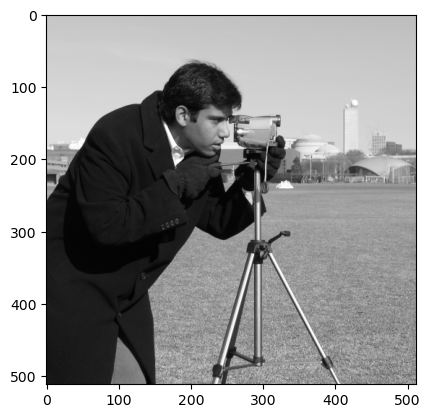

In [5]:
# Visualize the image
import matplotlib.pyplot as plt

plt.imshow(x, cmap="gray")
plt.show()

SVD:  (512, 512)  @  (512,)  @  (512, 512)
Compressed X_k:  (512, 512)


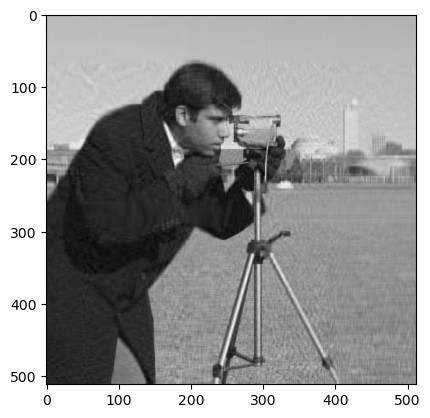

In [11]:
import numpy as np

# Step 1: Compute the SVD of the image
U, s, VT = np.linalg.svd(x, full_matrices=False)
S = np.diag(s) ## vera matrice diagonale
print("SVD: ",U.shape, " @ ", s.shape," @ ", VT.shape)

# Fix k and compute X_k
k = 50
X_k = U[:, :k] @ S[:k, :k] @ VT[:k, :] # home work will be partially on understanding this formula
print("Compressed X_k: ",X_k.shape)

# Visualize the compressed image
# Can be used to compress images
plt.imshow(X_k, cmap="gray")
plt.show()

# Dyad

the first dyad is about the context, while more you advance on the dyad the more the dyad is focused on the detail

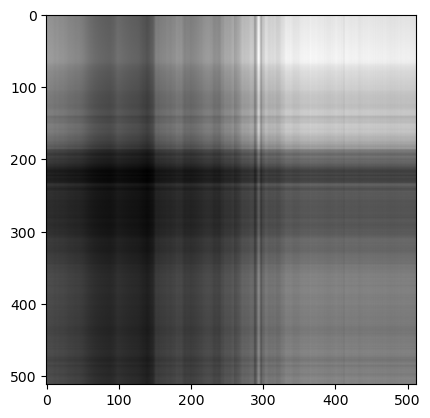

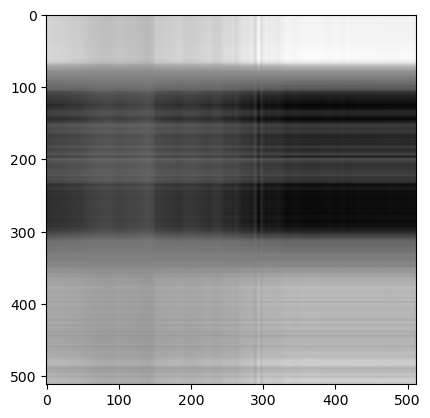

In [ ]:
# Compute a dyad
d1 = U[:, 0:1] @ VT[0:1, :]
d3 = U[:, 2:3] @ VT[0:1, :] # non sono sicuro che sia giusto

plt.imshow(d1, cmap="gray")
plt.show()
plt.imshow(d3, cmap="gray")
plt.show()

# PCA Principal component Analisys
una specie di algoritmo di classificazione?

we want data who are semantically similar to be close togeder




Z = X(P^T)  # è stato dimostrato che la matrice Z è la miglior rappresentazione possibile senza perdere dati


???
Centrare i dati intorno al baricentro aiuta a standardizzare la soluzione
Prendiamo i dati, calcoliamo il centroide e poi lo sottraiamo a X ??

In [24]:
import numpy as np

# Load data into memory (we use numpy as pandas may not work on Lab PCs)
data = np.genfromtxt("MNIST.csv", delimiter=",")[1:]
print(f"Shape of the data: {data.shape}")

Shape of the data: (42000, 785)


In [ ]:
# Split data into a matrix X and a vector Y where:
#
# X is dimension (42000, 784)  # sono immagini di numeri 28x28 pixel appiattite
# Y is dimension (42000, )
# Y is the first column of data, while X is everything else
X = data[:, :-1]
Y = data[:, 0]

print(f"Shape of X: {X.shape}, Shape of Y:{Y.shape}.")

Shape of X: (42000, 784), Shape of Y:(42000,).
[1. 0. 1. 4. 0. 0. 7. 3. 5. 3.]


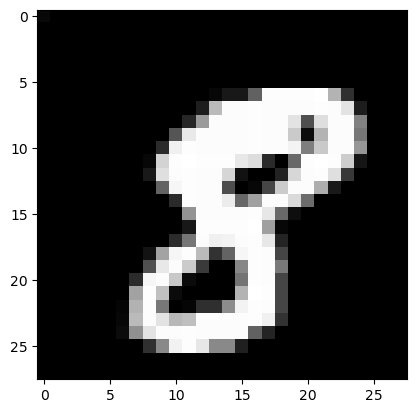

The associated digit is: 8.0


In [30]:
import matplotlib.pyplot as plt

# Immagine in the dataset are vector so to visualize them we need to reshape themì
def visualize(X, idx):
    # Visualize the image of index 'idx' from the dataset 'X'

    # Load an image in memory
    img = X[idx]
    
    # Reshape it
    img = np.reshape(img, (28, 28))

    # Visualize
    plt.imshow(img, cmap='gray')
    plt.show()

# Visualize image number 10 and the corresponding digit.
idx = 10
visualize(X, idx)
print(f"The associated digit is: {Y[idx]}")

Final shape of X: (8423, 784). Final shape of Y: (8423,)


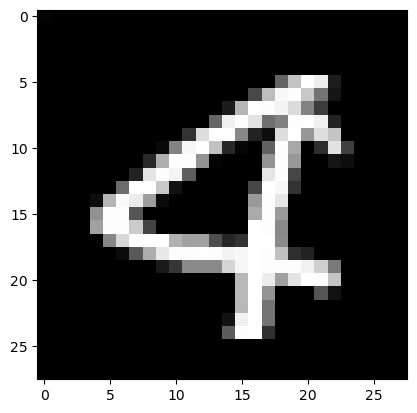

In [31]:
# Filtriamo tutti i Digit che non sono 3 o 4 grazie alle loro labels

# Define the boolean array to filter out digits
filter_3or4 = (Y==3) | (Y==4)

# Define the filtered data
X_filtered = X[filter_3or4]
Y_filtered = Y[filter_3or4]

# Print final shape of data
print(f"Final shape of X: {X_filtered.shape}. Final shape of Y: {Y_filtered.shape}")

# Memorize the shape of X in the variables N and d
N, d = X_filtered.shape

# Visualize a sample just to prove that we only have 3 or 4
visualize(X_filtered, 10)

In [32]:
# Split into training and validation sets

def split_data(X, Y, N_train):
    N, d = X.shape

    # Sample indices and shuffle them
    idx = np.arange(N)
    np.random.shuffle(idx)

    # Extract the set of index 
    train_idx = idx[:N_train] # for the training set
    test_idx = idx[N_train:]  # and for the test set
    
    # Training split
    X_train = X[train_idx]
    Y_train = Y[train_idx]
    
    # Test split
    X_test = X[test_idx]
    Y_test = Y[test_idx]

    return (X_train, Y_train), (X_test, Y_test)

# Split
N_train = int(N * 0.8)
(X_train, Y_train), (X_test, Y_test) = split_data(X_filtered, Y_filtered, N_train)

print(X_train.shape, X_test.shape)

(6738, 784) (1685, 784)


In [33]:
# Compute centroid
cX = np.mean(X, axis=0)

# Make it a row vector
cX = np.reshape(cX, (1, d))
print(f"Shape of c(X): {cX.shape}.")

# Center the data (row-by-row)
Xc = X - cX

# Compute SVD decomposition
U, s, VT = np.linalg.svd(Xc, full_matrices=False)

# Given k, compute reduced SVD
k = 2
VTk = VT[:k]

# Define projection matrix
P = VTk

# Project Xc -> Z_train
Z_train = Xc @ P.T
print(f"Shape of projected data: {Z_train.shape}.")

Shape of c(X): (1, 784).
Shape of projected data: (42000, 2).


ValueError: 'c' argument has 6738 elements, which is inconsistent with 'x' and 'y' with size 42000.

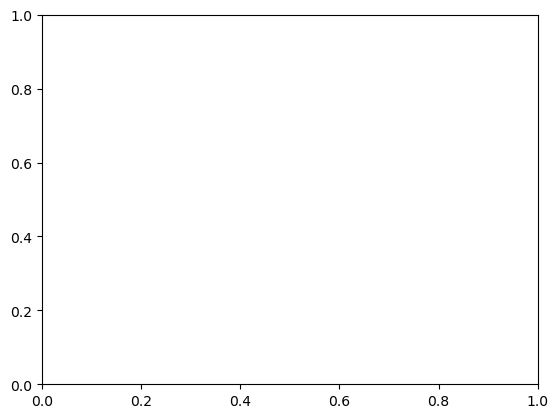

In [34]:
# Visualize the clusters
# Dovrebbe mostrare due cluster distinti uno per le immagini di 3 e uno per le immagini di 4
# li posizionerà in base alla somiglianza delle immagini e grazie alla PCA. 
# I  colori delle risposte corrette vengono dati invece dalle etichette Y_train

# This is the basic concept of pretraining in machine learning

ax = plt.scatter(Z_train[:, 0], Z_train[:, 1], c=Y_train) # visualize data in 2D
plt.legend(*ax.legend_elements(), title="Digit") # Add to the legend the list of digits
plt.xlabel(r"$z_1$")
plt.ylabel(r"$z_2$")
plt.title("PCA projection of MNIST digits 3 and 4")
plt.grid()
plt.show()